
# Comparasion of Different Canonical Coordinates
## Author
Brandon Behring

W


In [20]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
include("PSS_Definitions_Dimer.jl")
# pygui(true);
using Roots

function Q1_find_dimer(Q2,P2,H_dimer)
    Q1_to_find(Q1)=Hamiltonian_Dimer([Q1,Q2],[0,P2],1)-H_dimer
    try
        Q1=find_zeros(Q1_to_find,0,10,maxeval=100,maxfnevals=300,tol=1e-15)
     catch
        Q1=zeros(0)
    end
end
H=.1
# Yfind(h)=sqrt(h/(2h+1));
# P=Yfind(H)

In [21]:
# Y=Yfind(H)0.23529411764705893
P=.1
Q1=Q1_find_dimer(1.5,0,H)
t_end=1000.0;
q0,p0=[zeros(2) for i in 1:2]
q0[1]=Q1[1]; 
q0[2]=1.5; 
p0[1]=0; 
p0[2]=0;
Q1

2-element Array{Float64,1}:
 0.3004253058102032
 3.853898021825551 

In [22]:
prob= HamiltonianProblem{true}(Hamiltonian_Dimer, q0, p0, (0., t_end));
@time t,A=solve(prob, Vern9(),reltol=1e-13,abstol=1e-15,maxiters=1e15);

 14.659902 seconds (23.44 M allocations: 751.350 MiB, 5.11% gc time)


In [16]:
q1=A[1,:]
q2=A[2,:]
p1=A[3,:]
p2=A[4,:];

In [17]:
Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1+p2)/sqrt(2)
P2=(p1-p2)/sqrt(2);

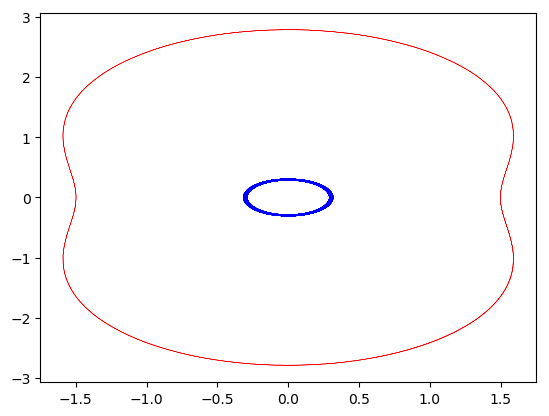

In [18]:
figure()
plot(q1,p1,"b",linewidth=.1)
plot(q2,p2,"r",linewidth=.1);

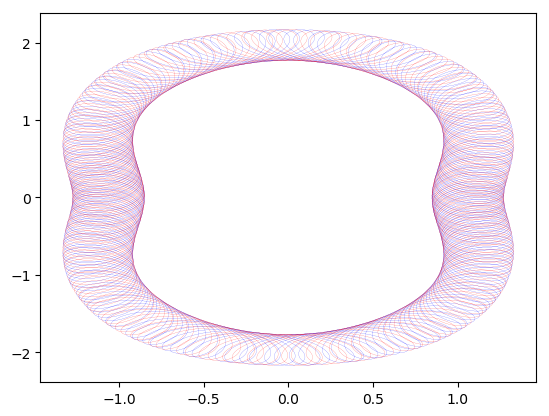

In [9]:
figure()
plot(Q1,P1,"b",linewidth=.1)
plot(Q2,P2,"r",linewidth=.1);

In [19]:
t_end=5e2;
@time Q_PSS,P_PSS=PSS_function( q0[2], p0[2], H, t_end);
plot(Q_PSS,P_PSS,".", markersize=4, c
    ="k");

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,1} to an object of type Float64
Closest candidates are:
  convert(::Type{T<:Number}, !Matched::T<:Number) where T<:Number at number.jl:6
  convert(::Type{T<:Number}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T<:Number}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:250
  ...

In [10]:
N_iter_Q=50;#50
Q_start=-.3
Q_end=.3
N_iter_P=100
P_start=-.9
P_end=.9

ArrP=range(P_start,stop=P_end,length=N_iter_P)
ArrQ=range(Q_start,stop=Q_end,length=N_iter_Q)
Brandons_Colors=["#393b79" ,"#5254a3","#6b6ecf","#9c9ede" ,"#637939","#8ca252" ,"#b5cf6b" ,"#cedb9c" ,"#8c6d31","#bd9e39" ,"#e7ba52","#e7cb94","#843c39","#ad494a" ,"#d6616b","#e7969c" ,"#7b4173" ,"#a55194","#ce6dbd" ,"#de9ed6"];

In [11]:
figure()
@time for k=1:N_iter_P
    global count=1
    Q_PSS,P_PSS=PSS_function( 0, ArrP[k], H, t_end,count);       
    current_color=Brandons_Colors[mod(k,length(Brandons_Colors))+1]
    if Q_PSS!=0
         plot(Q_PSS,P_PSS,".", markersize=.1,c=current_color);
    end
end

MethodError: MethodError: no method matching PSS_function(::Int64, ::Float64, ::Float64, ::Float64, ::Int64)
Closest candidates are:
  PSS_function(::Any, ::Any, ::Any, ::Any) at /home/brandon_behring/Desktop/Leap_Frog_2019/PSS_Definitions_Dimer.jl:22